In [90]:
import numpy as np
import pandas as pd
import re
from pathlib import Path
import math
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns


# Investigating demographic variable in the census data (education).

1. Read the Education Demographics Data 

In [91]:
education_demo = pd.read_csv('../can-summer-2023/data/clean/education_demographics.csv')
education_demo

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [98]:
population_demo = pd.read_csv('../can-summer-2023/data/clean/population_demographics.csv')
population_demo

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,3058,9849.455,1525,1533,12,11,...,38,0,2075,330,0,457,0,46,150,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,7952,44222.540,3377,4575,208,306,...,425,109,4729,536,0,1864,0,427,396,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,8984,70236.120,4502,4482,258,26,...,32,0,5542,174,0,2757,0,228,283,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,5613,24655.630,2697,2916,288,241,...,181,0,3476,276,17,1352,0,102,390,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [99]:
to_merge = population_demo[['qualifying name', 'total population']]
to_merge.head()

,qualifying name,total population
0,"Census Tract 8233.03, Cook County, Illinois",4059
1,"Census Tract 8233.04, Cook County, Illinois",6316
2,"Census Tract 7404, Cook County, Illinois",4738
3,"Census Tract 7403, Cook County, Illinois",5017
4,"Census Tract 8228.02, Cook County, Illinois",3750


In [100]:
new_education = education_demo.merge(to_merge, on='qualifying name')
new_education.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,total population
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.72096 41.68395, -87.72030 41.683...",4059
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ...",6316
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.69127, -87.71937 41.691...",4738
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.72043 41.69857, -87.72007 41.698...",5017
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.72075 41.70204, -87.72075 ...",3750


AttributeError: PatchCollection.set() got an unexpected keyword argument 'title'

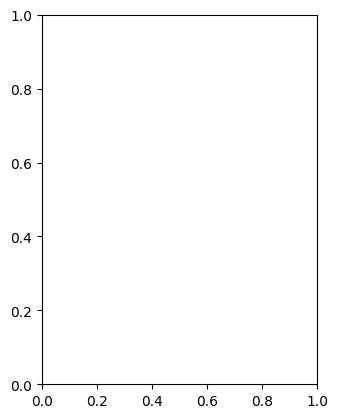

In [92]:
from shapely import wkt
#Converting df to gdf
education_demo['geometry'] = education_demo['geometry'].apply(wkt.loads)
education_demo = gpd.GeoDataFrame(education_demo, crs="EPSG:4326", geometry=education_demo['geometry'])





education_demo.plot(column = 'population 25 years and over', legend = True, title='Population 25 Years and Over Heatmap')

<Axes: >

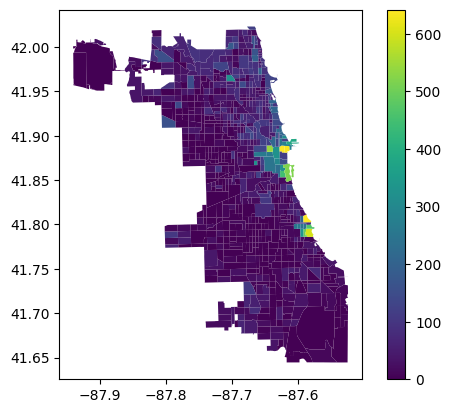

In [94]:
education_demo.plot(column = 'population 25 years and over: doctorate degree', legend = True)

<Axes: >

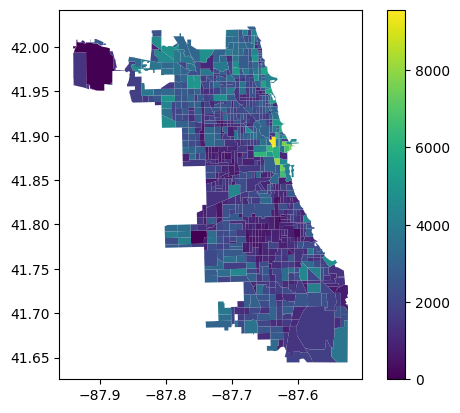

In [95]:
education_demo.plot(column = 'population 25 years and over: high school graduate or more (includes equivalency)', legend = True)

<Axes: >

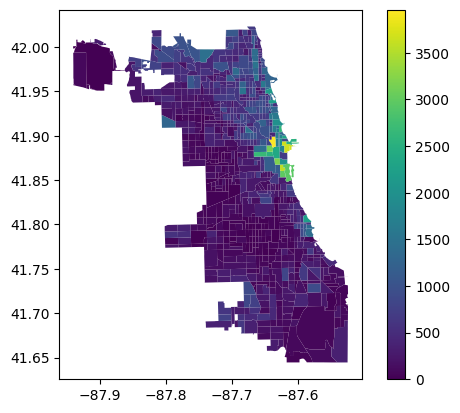

In [96]:
education_demo.plot(column = 'population 25 years and over: master\'s degree or more', legend = True)

<Axes: >

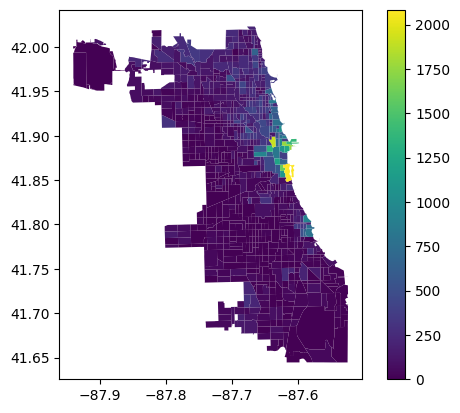

In [97]:
education_demo.plot(column = 'population 25 years and over: professional school degree or more', legend = True)

a. What is the distribution of age groups in the population?

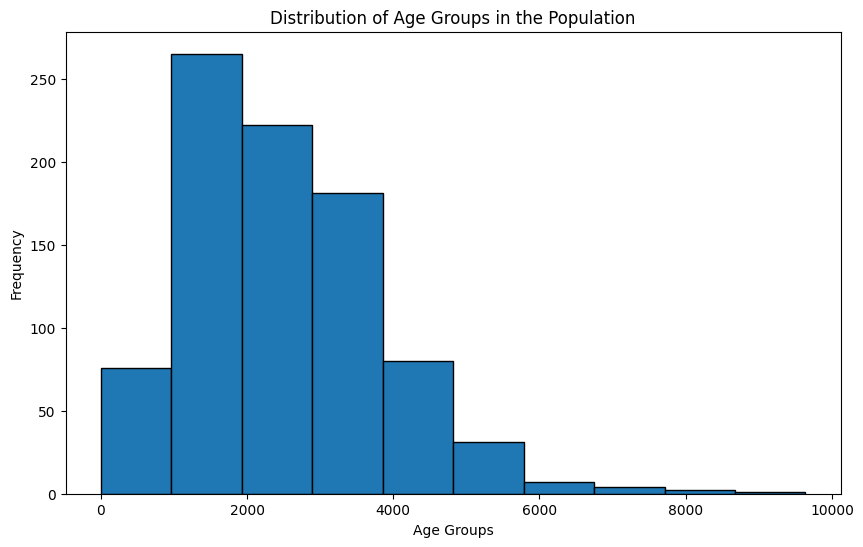

In [81]:
# Plotting the distribution of age groups
plt.figure(figsize=(10, 6))
plt.hist(education_demo['population 25 years and over'], bins=10, edgecolor='black')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups in the Population')
plt.show()


b.Is there a correlation between age distribution and educational attainment?



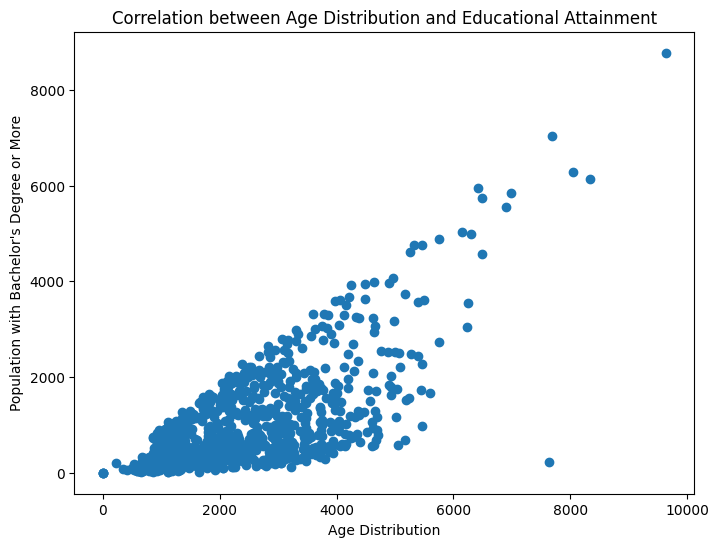

In [82]:
# Scatter plot of age distribution vs. population with bachelor's degree or more
plt.figure(figsize=(8, 6))
plt.scatter(education_demo['population 25 years and over'], education_demo["population 25 years and over: bachelor's degree or more"])
plt.xlabel('Age Distribution')
plt.ylabel('Population with Bachelor\'s Degree or More')
plt.title('Correlation between Age Distribution and Educational Attainment')
plt.show()


In [83]:
correlation = education_demo['population 25 years and over'].corr(education_demo["population 25 years and over: bachelor's degree or more"])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.6851909670768475


This following code creates histograms to visualize the distribution of education levels in Cook County:

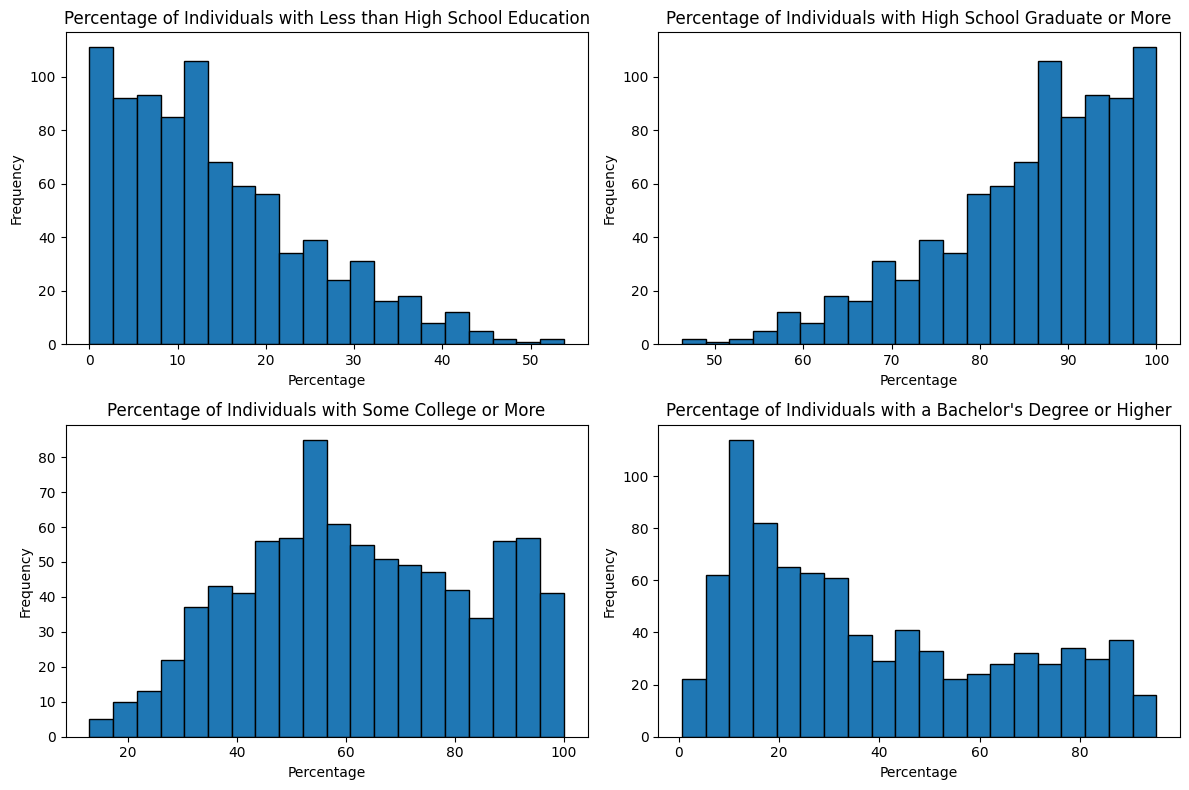

In [87]:
# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for individuals with less than high school education
axes[0, 0].hist(cook_county_demo['percent_less_than_high_school'], bins=20, edgecolor='black')
axes[0, 0].set_title('Percentage of Individuals with Less than High School Education')
axes[0, 0].set_xlabel('Percentage')
axes[0, 0].set_ylabel('Frequency')

# Histogram for individuals with high school graduate or more
axes[0, 1].hist(cook_county_demo['percent_high_school_graduate'], bins=20, edgecolor='black')
axes[0, 1].set_title('Percentage of Individuals with High School Graduate or More')
axes[0, 1].set_xlabel('Percentage')
axes[0, 1].set_ylabel('Frequency')

# Histogram for individuals with some college or more
axes[1, 0].hist(cook_county_demo['percent_some_college'], bins=20, edgecolor='black')
axes[1, 0].set_title('Percentage of Individuals with Some College or More')
axes[1, 0].set_xlabel('Percentage')
axes[1, 0].set_ylabel('Frequency')

# Histogram for individuals with a bachelor's degree or higher
axes[1, 1].hist(cook_county_demo['percent_bachelors_degree_or_higher'], bins=20, edgecolor='black')
axes[1, 1].set_title('Percentage of Individuals with a Bachelor\'s Degree or Higher')
axes[1, 1].set_xlabel('Percentage')
axes[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the histograms
plt.show()